In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [3]:
data = pd.read_csv(r"C:\Users\David\OneDrive\Documentos\GitHub\ProyectoFinalUpgradeHub\personality_datasert.csv")
data.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert
3,0.0,No,6.0,7.0,No,14.0,8.0,Extrovert
4,3.0,No,9.0,4.0,No,8.0,5.0,Extrovert


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2900 entries, 0 to 2899
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time_spent_Alone           2900 non-null   float64
 1   Stage_fear                 2900 non-null   object 
 2   Social_event_attendance    2900 non-null   float64
 3   Going_outside              2900 non-null   float64
 4   Drained_after_socializing  2900 non-null   object 
 5   Friends_circle_size        2900 non-null   float64
 6   Post_frequency             2900 non-null   float64
 7   Personality                2900 non-null   object 
dtypes: float64(5), object(3)
memory usage: 181.4+ KB


In [5]:
data.columns

Index(['Time_spent_Alone', 'Stage_fear', 'Social_event_attendance',
       'Going_outside', 'Drained_after_socializing', 'Friends_circle_size',
       'Post_frequency', 'Personality'],
      dtype='object')

In [6]:
data["Personality"].value_counts()

Personality
Extrovert    1491
Introvert    1409
Name: count, dtype: int64

array([[<Axes: title={'center': 'Time_spent_Alone'}>,
        <Axes: title={'center': 'Social_event_attendance'}>],
       [<Axes: title={'center': 'Going_outside'}>,
        <Axes: title={'center': 'Friends_circle_size'}>],
       [<Axes: title={'center': 'Post_frequency'}>, <Axes: >]],
      dtype=object)

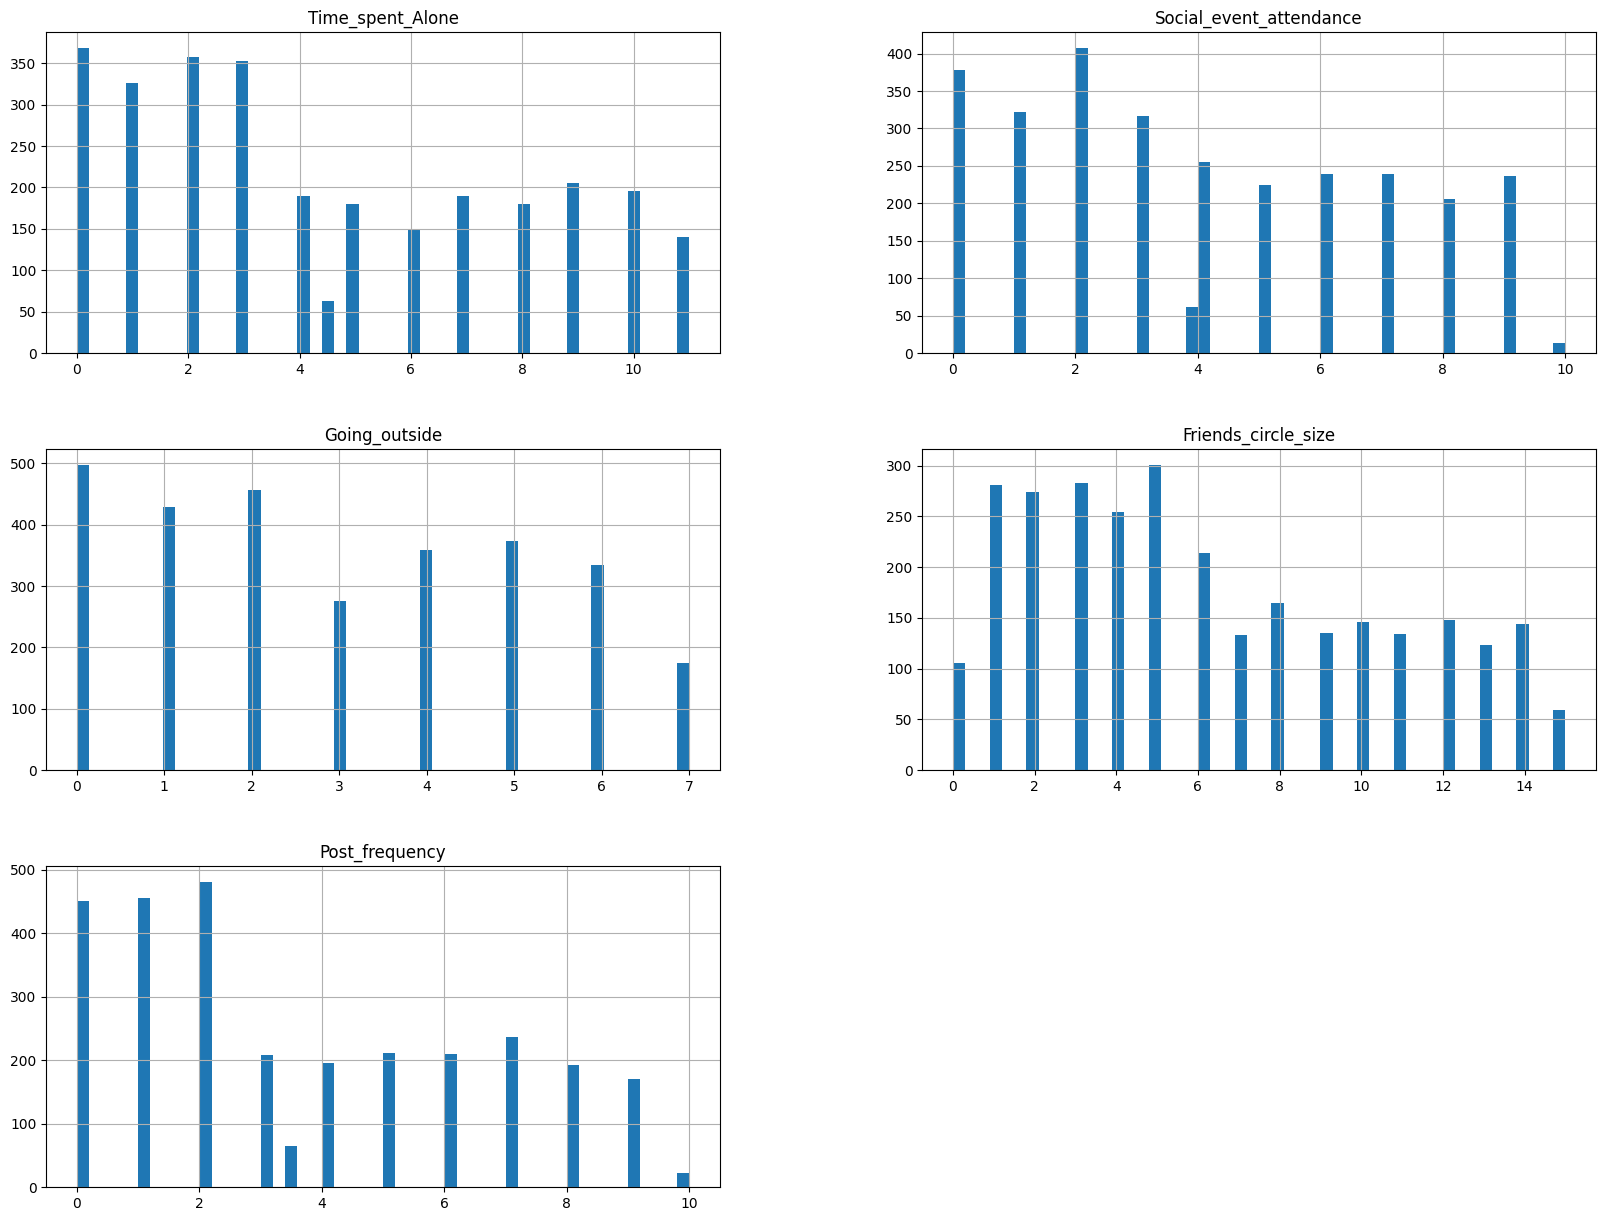

In [7]:
data.hist(bins=50,figsize=(20,15))

<Axes: >

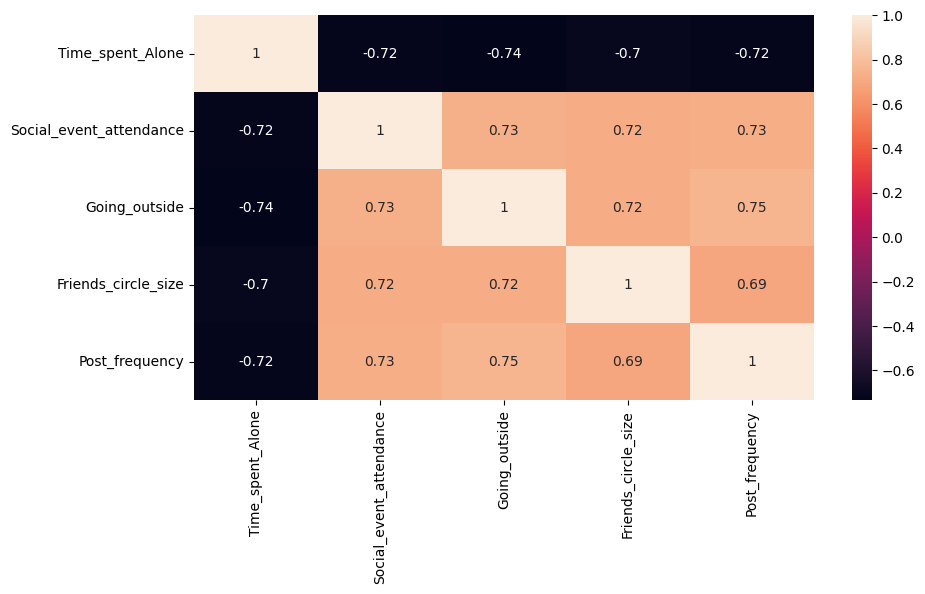

In [8]:
plt.figure(figsize=(10,5))
sns.heatmap(data.select_dtypes(include="number").corr(),annot=True)

In [9]:
# Manipulacion de los datos categoricos 

from sklearn.preprocessing import OrdinalEncoder 

data_personality = data[["Personality"]]
data_personality

ordinal_encoder = OrdinalEncoder()
ordinal_encoder

data_personality_encoder = ordinal_encoder.fit_transform(data_personality)
data_personality_encoder


array([[0.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [0.]], shape=(2900, 1))

In [10]:
data.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert
3,0.0,No,6.0,7.0,No,14.0,8.0,Extrovert
4,3.0,No,9.0,4.0,No,8.0,5.0,Extrovert


In [11]:
np.random.choice(data_personality_encoder.ravel(),size=10)

array([0., 1., 0., 0., 0., 0., 0., 1., 1., 1.])

In [12]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
cat_encoder

data_cat_1hot = cat_encoder.fit_transform(data_personality)

In [13]:
data_cat_1hot.toarray()

array([[1., 0.],
       [0., 1.],
       [0., 1.],
       ...,
       [0., 1.],
       [0., 1.],
       [1., 0.]], shape=(2900, 2))

In [14]:
cat_encoder.categories_

[array(['Extrovert', 'Introvert'], dtype=object)]

In [15]:
encoded_df = pd.DataFrame(data_cat_1hot.toarray(), columns = cat_encoder.get_feature_names_out())

encoded_df.head()

,Personality_Extrovert,Personality_Introvert
0,1.0,0.0
1,0.0,1.0
2,0.0,1.0
3,1.0,0.0
4,1.0,0.0


In [16]:
data['Personality_mapped'] = data['Personality'].map({'Extrovert': 1, 'Introvert': 0})
data[['Personality', 'Personality_mapped']].head()

,Personality,Personality_mapped
0,Extrovert,1
1,Introvert,0
2,Introvert,0
3,Extrovert,1
4,Extrovert,1


In [17]:
# Unimos el dataframe original con el dataframe codificado one-hot
data_combined = pd.concat([data, encoded_df], axis=1)
data_combined.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality,Personality_mapped,Personality_Extrovert,Personality_Introvert
0,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert,1,1.0,0.0
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert,0,0.0,1.0
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert,0,0.0,1.0
3,0.0,No,6.0,7.0,No,14.0,8.0,Extrovert,1,1.0,0.0
4,3.0,No,9.0,4.0,No,8.0,5.0,Extrovert,1,1.0,0.0


In [18]:
data_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2900 entries, 0 to 2899
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time_spent_Alone           2900 non-null   float64
 1   Stage_fear                 2900 non-null   object 
 2   Social_event_attendance    2900 non-null   float64
 3   Going_outside              2900 non-null   float64
 4   Drained_after_socializing  2900 non-null   object 
 5   Friends_circle_size        2900 non-null   float64
 6   Post_frequency             2900 non-null   float64
 7   Personality                2900 non-null   object 
 8   Personality_mapped         2900 non-null   int64  
 9   Personality_Extrovert      2900 non-null   float64
 10  Personality_Introvert      2900 non-null   float64
dtypes: float64(7), int64(1), object(3)
memory usage: 249.3+ KB


In [19]:
data.columns

Index(['Time_spent_Alone', 'Stage_fear', 'Social_event_attendance',
       'Going_outside', 'Drained_after_socializing', 'Friends_circle_size',
       'Post_frequency', 'Personality', 'Personality_mapped'],
      dtype='object')

In [20]:
y = data_combined["Personality_mapped"].values.reshape(-1,1)
X = [['Time_spent_Alone', 'Social_event_attendance',
       'Going_outside', 'Friends_circle_size',"Drained_after_socializing",
       'Post_frequency']]

In [21]:
data.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality,Personality_mapped
0,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert,1
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert,0
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert,0
3,0.0,No,6.0,7.0,No,14.0,8.0,Extrovert,1
4,3.0,No,9.0,4.0,No,8.0,5.0,Extrovert,1


In [22]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [23]:
columnas = ['Time_spent_Alone', 'Social_event_attendance',
       'Going_outside', 'Friends_circle_size',
       'Post_frequency']

col_modelo = []

for col in columnas: 
    col_modelo.append(col)
    data1 = data[col_modelo]
    X = data1.values

    X_train, X_test, y_train, y_test = train_test_split(X,y)
    tree_reg = DecisionTreeRegressor()
    tree_reg.fit(X_train, y_train)
    y_pred = tree_reg.predict(X_test)
    r2 = r2_score(y_test,y_pred)
    print(col_modelo,r2)

['Time_spent_Alone'] 0.6879663662501543
['Time_spent_Alone', 'Social_event_attendance'] 0.7223554246192947
['Time_spent_Alone', 'Social_event_attendance', 'Going_outside'] 0.7344424831376345
['Time_spent_Alone', 'Social_event_attendance', 'Going_outside', 'Friends_circle_size'] 0.5282372297070351
['Time_spent_Alone', 'Social_event_attendance', 'Going_outside', 'Friends_circle_size', 'Post_frequency'] 0.518674424995772


In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Entrenamos un modelo Random Forest para mejorar el rendimiento
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train.ravel())

# Predicciones
y_pred_rf = rf_clf.predict(X_test)

# Evaluación
acc = accuracy_score(y_test, y_pred_rf)
print("Accuracy:", acc)
print("Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

Accuracy: 0.9255172413793104
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.93      0.93       360
           1       0.93      0.92      0.93       365

    accuracy                           0.93       725
   macro avg       0.93      0.93      0.93       725
weighted avg       0.93      0.93      0.93       725

Confusion Matrix:
 [[336  24]
 [ 30 335]]


In [25]:
# Probar el modelo Random Forest con los datos de prueba y mostrar algunas predicciones
sample_idx = np.random.choice(len(X_test), size=10, replace=False)
X_sample = X_test[sample_idx]
y_true_sample = y_test[sample_idx].ravel()
y_pred_sample = rf_clf.predict(X_sample)

for i, (true, pred) in enumerate(zip(y_true_sample, y_pred_sample)):
    print(f"Ejemplo {i+1}: Real = {true}, Predicho = {pred}")

Ejemplo 1: Real = 0, Predicho = 0
Ejemplo 2: Real = 0, Predicho = 0
Ejemplo 3: Real = 1, Predicho = 1
Ejemplo 4: Real = 1, Predicho = 1
Ejemplo 5: Real = 1, Predicho = 1
Ejemplo 6: Real = 1, Predicho = 1
Ejemplo 7: Real = 1, Predicho = 1
Ejemplo 8: Real = 0, Predicho = 0
Ejemplo 9: Real = 1, Predicho = 1
Ejemplo 10: Real = 1, Predicho = 1


In [26]:
# Introducir una nueva persona (puedes modificar los valores según el caso)
# Orden de las características: ['Time_spent_Alone', 'Social_event_attendance', 'Going_outside', 'Friends_circle_size', 'Post_frequency']
nueva_persona = np.array([[5, 3, 4, 7, 6]])

# Predecir con el modelo Random Forest
prediccion = rf_clf.predict(nueva_persona)[0]

# Mostrar el resultado
if prediccion == 1:
    print("La persona es Extrovert")
else:
    print("La persona es Introvert")

La persona es Extrovert


In [27]:
import joblib
joblib.dump(rf_clf, "rf_model_personality.pkl")

['rf_model_personality.pkl']

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2900 entries, 0 to 2899
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time_spent_Alone           2900 non-null   float64
 1   Stage_fear                 2900 non-null   object 
 2   Social_event_attendance    2900 non-null   float64
 3   Going_outside              2900 non-null   float64
 4   Drained_after_socializing  2900 non-null   object 
 5   Friends_circle_size        2900 non-null   float64
 6   Post_frequency             2900 non-null   float64
 7   Personality                2900 non-null   object 
 8   Personality_mapped         2900 non-null   int64  
dtypes: float64(5), int64(1), object(3)
memory usage: 204.0+ KB


<Axes: >

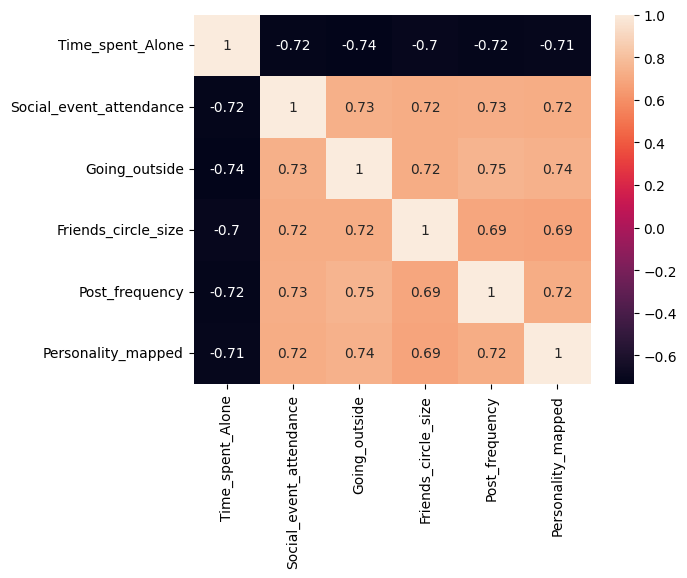

In [29]:
corr_matrix = data.select_dtypes(include=[np.number]).corr()
corr_matrix

sns.heatmap(corr_matrix,annot=True)

In [30]:
# codigo de regresión

Time_spent_Alone: -0.026166352105993555
Social_event_attendance: 0.032859470788436165
Going_outside: 0.0508433020939984
Friends_circle_size: 0.014838378686257175
Post_frequency: 0.03232621090625854


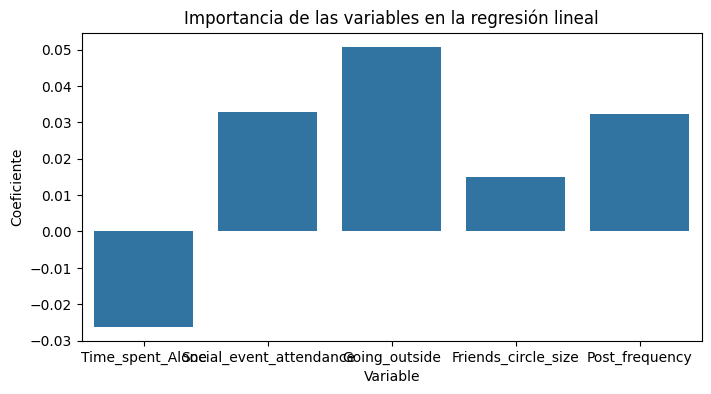

In [31]:
from sklearn.linear_model import LinearRegression

# Entrenar el modelo de regresión lineal
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Obtener los coeficientes de las variables
coeficientes = lin_reg.coef_.flatten()
variables = col_modelo

# Mostrar la importancia de cada variable
for var, coef in zip(variables, coeficientes):
    print(f"{var}: {coef}")

# Visualizar la importancia de las variables
plt.figure(figsize=(8,4))
sns.barplot(x=variables, y=coeficientes)
plt.title("Importancia de las variables en la regresión lineal")
plt.ylabel("Coeficiente")
plt.xlabel("Variable")
plt.show()

In [32]:
data.to_csv("personality_data_export.csv", index=False)

In [33]:
data2 = pd.read_csv(r"C:\Users\David\OneDrive\Documentos\GitHub\ProyectoFinalUpgradeHub\column_2C_weka.csv")
data2.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


In [34]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          310 non-null    float64
 1   pelvic_tilt numeric       310 non-null    float64
 2   lumbar_lordosis_angle     310 non-null    float64
 3   sacral_slope              310 non-null    float64
 4   pelvic_radius             310 non-null    float64
 5   degree_spondylolisthesis  310 non-null    float64
 6   class                     310 non-null    object 
dtypes: float64(6), object(1)
memory usage: 17.1+ KB


In [35]:
data2.shape

(310, 7)

In [36]:
data2.describe()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


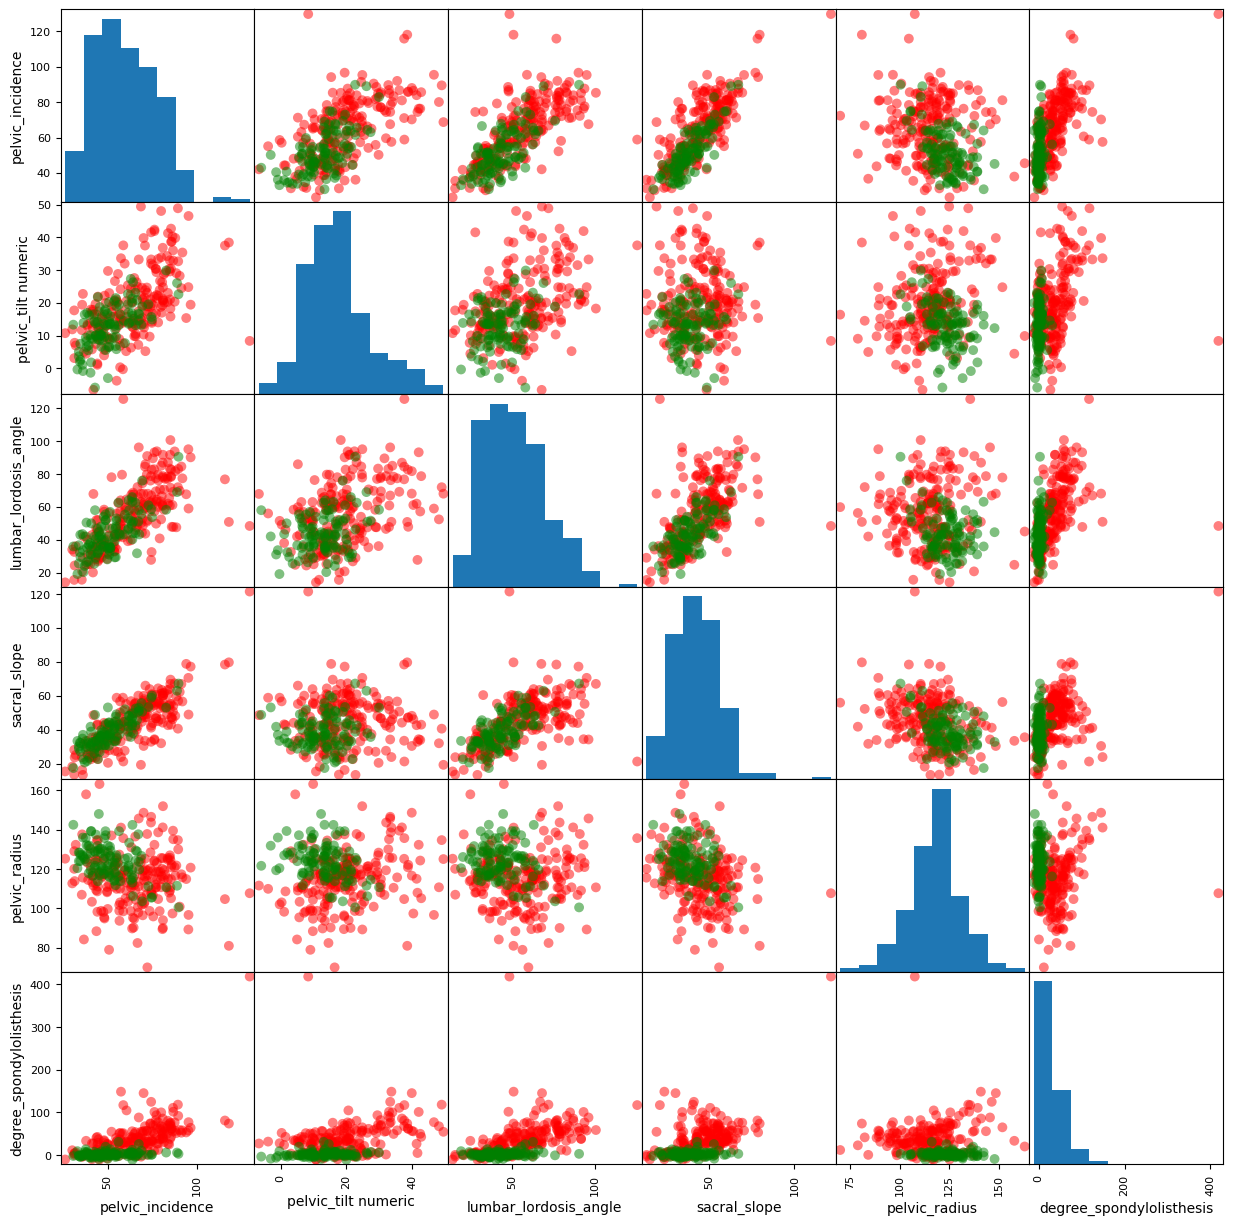

In [37]:
color_list = ['red' if i=='Abnormal' else 'green' for i in data2.loc[:,'class']]
pd.plotting.scatter_matrix(data2.loc[:, data2.columns != 'class'],
                                       c=color_list,
                                       figsize= [15,15],
                                       diagonal='hist',
                                       alpha=0.5,
                                       s = 200,
                                       
                                       )
plt.show()

In [38]:
contador = data2["class"].value_counts()

class
Abnormal    210
Normal      100
Name: count, dtype: int64

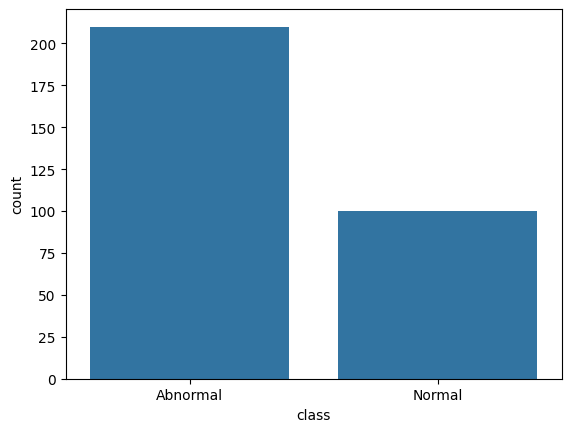

In [39]:
sns.countplot(x="class", data=data2)
data2["class"].value_counts()

In [40]:
data2.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


In [41]:
data2.iloc[:,-1].value_counts()

class
Abnormal    210
Normal      100
Name: count, dtype: int64

In [42]:
# KNN

In [43]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 3)

x = data2.loc[:, data2.columns != "class"]
y = data2.loc[:, "class"]

In [44]:
knn.fit(x,y)
prediction = knn.predict(x)
print("Prediction: {}".format(prediction))


Prediction: ['Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Normal' 'Normal'
 'Abnormal' 'Normal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Normal' 'Normal' 'Normal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Normal' 'Abnormal' 'Normal'
 'Normal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Normal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Ab

In [45]:
# train test split 

from sklearn.model_selection import train_test_split 

x = data2.loc[:, data2.columns != "class"]
y = data2.loc[:, "class"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(x_train, y_train)

prediction = knn.predict(x_test)

for i in range(len(prediction)):
    print(f"Ejemplo {i+1}: Real = {y_test.iloc[i]}, Predicción = {prediction[i]}")

print("Con KNN (K=3) precisión es:", knn.score(x_test, y_test)) #precisión


Ejemplo 1: Real = Abnormal, Predicción = Abnormal
Ejemplo 2: Real = Normal, Predicción = Normal
Ejemplo 3: Real = Abnormal, Predicción = Abnormal
Ejemplo 4: Real = Abnormal, Predicción = Abnormal
Ejemplo 5: Real = Abnormal, Predicción = Abnormal
Ejemplo 6: Real = Abnormal, Predicción = Abnormal
Ejemplo 7: Real = Normal, Predicción = Normal
Ejemplo 8: Real = Abnormal, Predicción = Abnormal
Ejemplo 9: Real = Abnormal, Predicción = Abnormal
Ejemplo 10: Real = Normal, Predicción = Normal
Ejemplo 11: Real = Normal, Predicción = Abnormal
Ejemplo 12: Real = Normal, Predicción = Normal
Ejemplo 13: Real = Abnormal, Predicción = Abnormal
Ejemplo 14: Real = Abnormal, Predicción = Abnormal
Ejemplo 15: Real = Normal, Predicción = Normal
Ejemplo 16: Real = Abnormal, Predicción = Abnormal
Ejemplo 17: Real = Normal, Predicción = Normal
Ejemplo 18: Real = Normal, Predicción = Normal
Ejemplo 19: Real = Normal, Predicción = Abnormal
Ejemplo 20: Real = Abnormal, Predicción = Abnormal
Ejemplo 21: Real = Ab

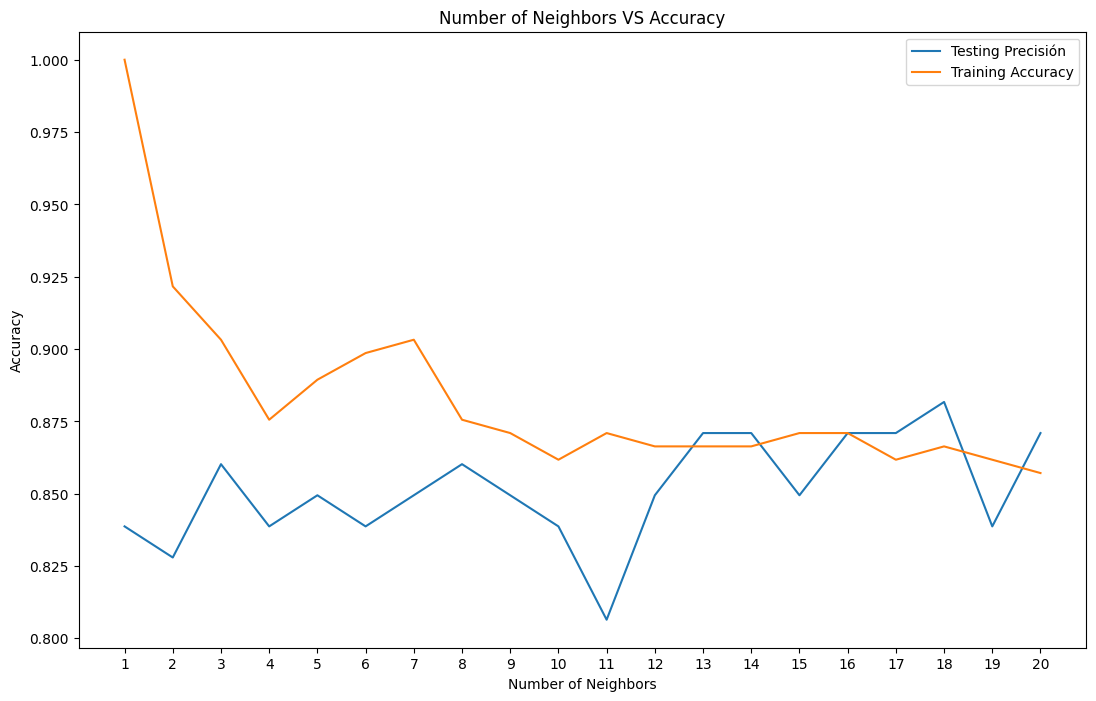

Mejor precisión is 0.8817204301075269 with k =18


In [46]:
# model complexity 

train_accuracy = []
test_accuracy = []

neighbors = range(1, 21)
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    # Fit with knn
    knn.fit(x_train, y_train)
    # train accuracy
    train_accuracy.append(knn.score(x_train, y_train))
    # test accuracy 
    test_accuracy.append(knn.score(x_test, y_test))

plt.figure(figsize=[13,8])
plt.plot(neighbors, test_accuracy, label="Testing Precisión")
plt.plot(neighbors, train_accuracy, label="Training Accuracy")
plt.legend()
plt.title("Number of Neighbors VS Accuracy")
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")
plt.xticks(neighbors)
plt.show()

print("Mejor precisión is {} with k ={}".format(np.max(test_accuracy), 1+test_accuracy.index(np.max(test_accuracy))))

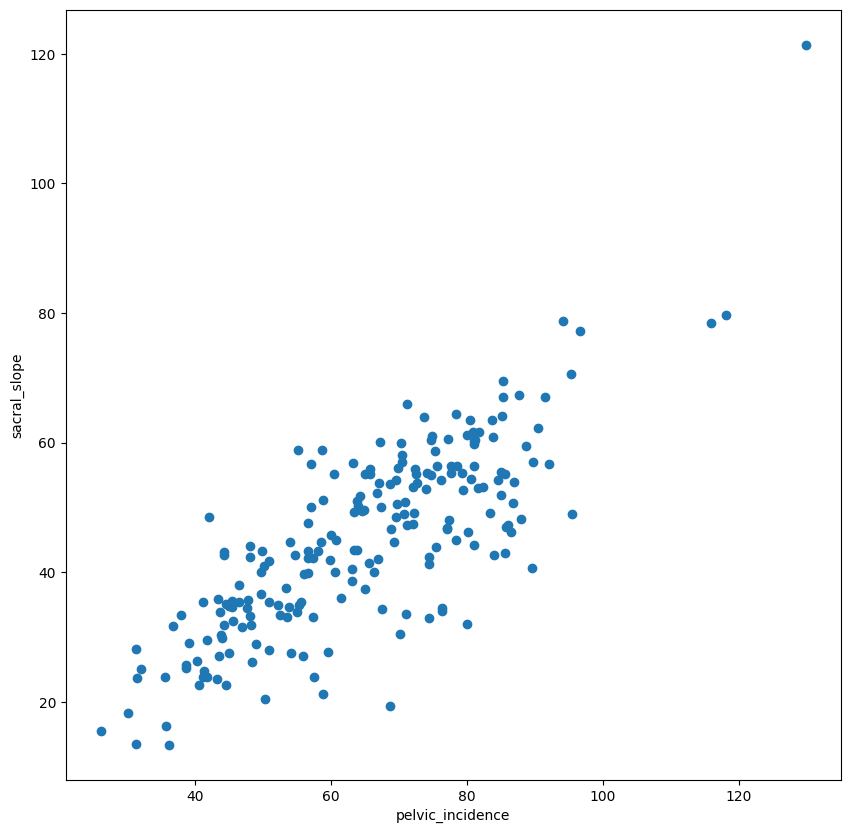

In [47]:
data3 = data2[data2["class"] == "Abnormal"]
data3

x = np.array(data3.loc[:,"pelvic_incidence"]).reshape(-1,1)
y = np.array(data3.loc[:,"sacral_slope"]).reshape(-1,1)

#Scatter

plt.figure(figsize=[10,10])
plt.scatter(x=x, y=y)
plt.xlabel("pelvic_incidence")
plt.ylabel("sacral_slope")
plt.show()

R2 socre: 0.6458410481075871


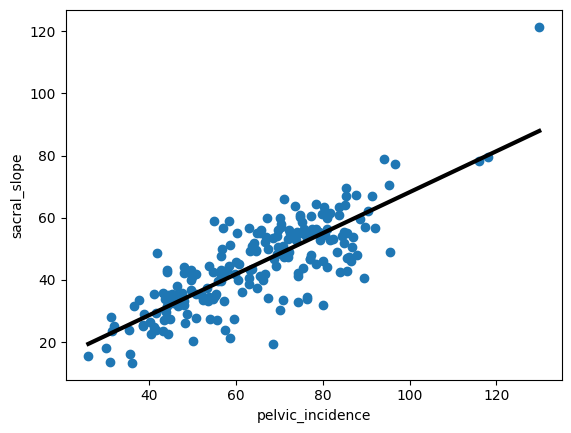

In [48]:
# LinearRegression 

from sklearn.linear_model import LinearRegression

reg = LinearRegression()

#Predict space

predict_space = np.linspace(min(x),max(x)).reshape(-1,1)

# Fit 

reg.fit(x,y)

# Predict

predicted = reg.predict(predict_space)

#R^2

print("R2 socre:", reg.score(x,y))

# Plot regression line and scatter

plt.plot(predict_space, predicted, color="black", linewidth=3)

plt.scatter(x=x, y=y)

plt.xlabel("pelvic_incidence")
plt.ylabel("sacral_slope")
plt.show()


In [49]:
# CV 

from sklearn.model_selection import cross_val_score
reg = LinearRegression()
k = 5
cv_result = cross_val_score(reg,x,y,cv=k)

# uses R^2 as score 

print("CV Scores:", cv_result)
print("CV scores average:", np.sum(cv_result)/k)

CV Scores: [0.32924233 0.61683991 0.53117056 0.1954798  0.29299864]
CV scores average: 0.3931462502884869


In [50]:
# Ridge 

from sklearn.linear_model import Ridge 

x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=2, test_size=0.3)

ridge = Ridge(alpha=0.1)
ridge.fit(x_train, y_train)
ridge_predict = ridge.predict(x_test)
print("Ridge score:", ridge.score(x_test, y_test))


Ridge score: 0.5732611808361024


In [51]:
# Lasso 

from sklearn.linear_model import Lasso

# Use only "Abnormal" class as in previous regression cells

x = np.array(data3.loc[:,["pelvic_incidence","pelvic_tilt numeric","lumbar_lordosis_angle","pelvic_radius"]])

x_train, x_test, y_train, y_test = train_test_split(x,y,random_state = 3,test_size = 0.3)

lasso = Lasso(alpha=0.1)
lasso.fit(x_train,y_train)
ridge_predict = lasso.predict(x_test)
print("Lasso score:", lasso.score(x_test, y_test))
print("Lasso coefficients:", lasso.coef_)

# Mostrar los coeficientes de Lasso con formato decimal
print("Lasso coefficients (decimales):", [f"{coef:.4f}" for coef in lasso.coef_])

# podemos ver que el pelvic_incidence y el pelvic_tilt numerci son importantes y los otros no

Lasso score: 0.9999985469460118
Lasso coefficients: [ 9.98901381e-01 -9.98137804e-01  3.13359061e-05 -0.00000000e+00]
Lasso coefficients (decimales): ['0.9989', '-0.9981', '0.0000', '-0.0000']


In [52]:
# Confusion matrix with random forest 

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

x = data2.loc[:,data2.columns !="class"]
y = data2.loc[:,"class"]

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3, random_state = 1)
rf = RandomForestClassifier(random_state = 4)

rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)

cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix: \n", cm)
print("Classification report: \n", classification_report(y_test,y_pred))

Confusion matrix: 
 [[60  6]
 [ 8 19]]
Classification report: 
               precision    recall  f1-score   support

    Abnormal       0.88      0.91      0.90        66
      Normal       0.76      0.70      0.73        27

    accuracy                           0.85        93
   macro avg       0.82      0.81      0.81        93
weighted avg       0.85      0.85      0.85        93



<Axes: >

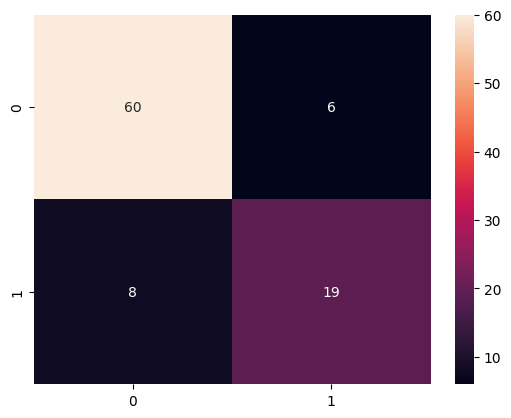

In [53]:
sns.heatmap(cm,annot=True,fmt="d")

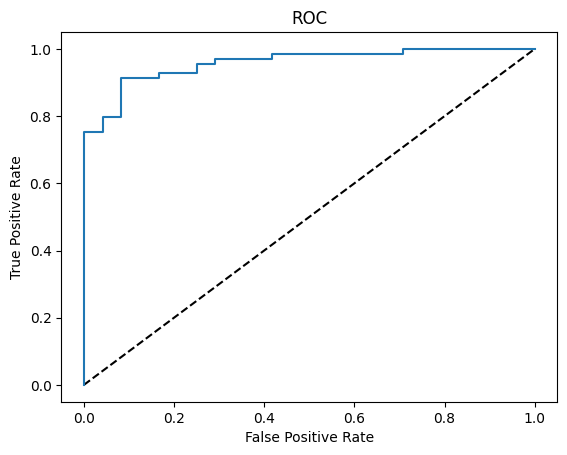

In [54]:
# ROC Curve with logistic regression
from sklearn.metrics import roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
# abnormal = 1 and normal = 0
data2['class_binary'] = [1 if i == 'Abnormal' else 0 for i in data2.loc[:,'class']]
x = data2.loc[:,(data2.columns != 'class') & (data2.columns != 'class_binary')]
y = data2.loc[:,'class_binary']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=42)
logreg = LogisticRegression()
logreg.fit(x_train,y_train)
y_pred_prob = logreg.predict_proba(x_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()

In [55]:
# grid search cross validation with 1 hyperparameter
from sklearn.model_selection import GridSearchCV
grid = {'n_neighbors': np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, grid, cv=3) # GridSearchCV
knn_cv.fit(x,y)# Fit

# Print hyperparameter
print("Tuned hyperparameter k: {}".format(knn_cv.best_params_)) 
print("Best score: {}".format(knn_cv.best_score_))

Tuned hyperparameter k: {'n_neighbors': np.int64(4)}
Best score: 0.7559434901667911


In [56]:
# grid search cross validation with 2 hyperparameter
# 1. hyperparameter is C:logistic regression regularization parameter
# 2. penalty l1 or l2
# Hyperparameter grid

param_grid = {'C': np.logspace(-3, 3, 7), 'penalty': ['l1', 'l2']}
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3,random_state = 12)
logreg = LogisticRegression()
logreg_cv = GridSearchCV(logreg,param_grid,cv=3)
logreg_cv.fit(x_train,y_train)

# Print the optimal parameters and best score
print("Tuned hyperparameters : {}".format(logreg_cv.best_params_))
print("Best Accuracy: {}".format(logreg_cv.best_score_))

Tuned hyperparameters : {'C': np.float64(0.001), 'penalty': 'l2'}
Best Accuracy: 0.8572425164890919


c:\Users\David\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
21 fits failed out of a total of 42.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
21 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\David\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\David\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\David\AppDat

In [57]:
data_de_nuevo = pd.read_csv(r"C:\Users\David\OneDrive\Documentos\GitHub\ProyectoFinalUpgradeHub\column_2C_weka.csv")
data_de_nuevo.head()

df = pd.get_dummies(data_de_nuevo)
df.head(10)

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class_Abnormal,class_Normal
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,True,False
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,True,False
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,True,False
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,True,False
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,True,False
5,40.250200,13.921907,25.124950,26.328293,130.327871,2.230652,True,False
6,53.432928,15.864336,37.165934,37.568592,120.567523,5.988551,True,False
7,45.366754,10.755611,29.038349,34.611142,117.270067,-10.675871,True,False
8,43.790190,13.533753,42.690814,30.256437,125.002893,13.289018,True,False
9,36.686353,5.010884,41.948751,31.675469,84.241415,0.664437,True,False


In [58]:
# drop one of the feature
df.drop("class_Normal",axis = 1, inplace = True) 
df.head(10)
# instead of two steps we can make it with one step pd.get_dummies(data,drop_first = True)

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class_Abnormal
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,True
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,True
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,True
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,True
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,True
5,40.250200,13.921907,25.124950,26.328293,130.327871,2.230652,True
6,53.432928,15.864336,37.165934,37.568592,120.567523,5.988551,True
7,45.366754,10.755611,29.038349,34.611142,117.270067,-10.675871,True
8,43.790190,13.533753,42.690814,30.256437,125.002893,13.289018,True
9,36.686353,5.010884,41.948751,31.675469,84.241415,0.664437,True


In [59]:
# SVM, pre-process and pipeline
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
steps = [('scalar', StandardScaler()),
         ('SVM', SVC())]
pipeline = Pipeline(steps)
parameters = {'SVM__C':[1, 10, 100],
              'SVM__gamma':[0.1, 0.01]}
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state = 1)
cv = GridSearchCV(pipeline,param_grid=parameters,cv=3)

cv.fit(x_train,y_train)

y_pred = cv.predict(x_test)

print("Accuracy: {}".format(cv.score(x_test, y_test)))
print("Tuned Model Parameters: {}".format(cv.best_params_))

Accuracy: 0.8548387096774194
Tuned Model Parameters: {'SVM__C': 100, 'SVM__gamma': 0.01}


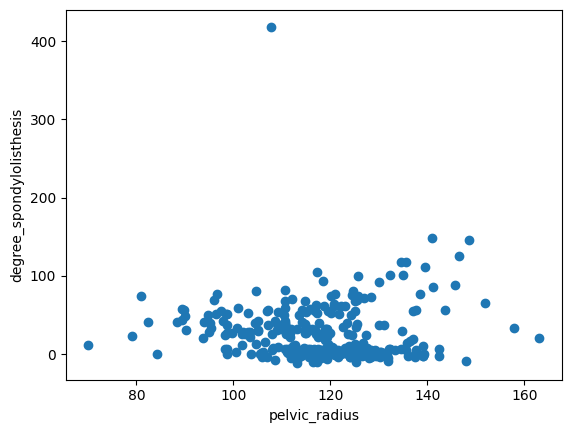

In [61]:
data_de_nuevo

plt.scatter(data_de_nuevo['pelvic_radius'],data_de_nuevo['degree_spondylolisthesis'])
plt.xlabel('pelvic_radius')
plt.ylabel('degree_spondylolisthesis')
plt.show()

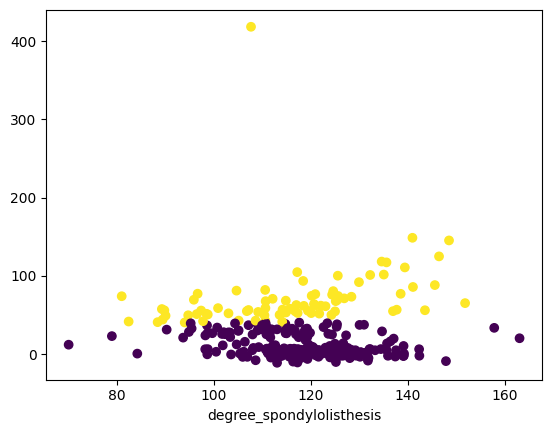

In [62]:
# KMeans Clustering
data2 = data_de_nuevo.loc[:,['degree_spondylolisthesis','pelvic_radius']]
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 2)
kmeans.fit(data2)
labels = kmeans.predict(data2)
plt.scatter(data_de_nuevo['pelvic_radius'],data_de_nuevo['degree_spondylolisthesis'],c = labels)
plt.xlabel('pelvic_radius')
plt.xlabel('degree_spondylolisthesis')
plt.show()

In [63]:
# cross tabulation table
df = pd.DataFrame({'labels':labels,"class":data_de_nuevo['class']})
ct = pd.crosstab(df['labels'],df['class'])
print(ct)

class   Abnormal  Normal
labels                  
0            130     100
1             80       0


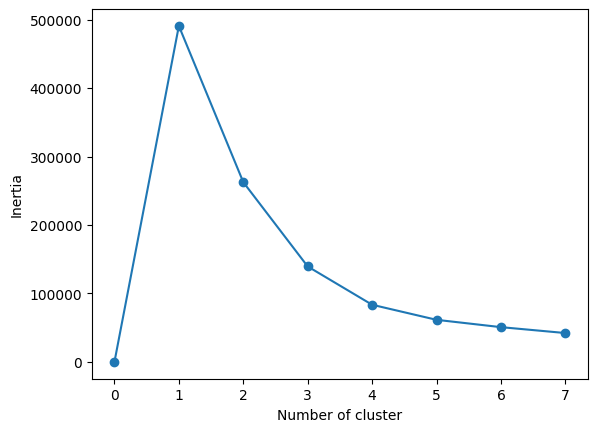

In [64]:
inertia_list = np.empty(8)
for i in range(1,8):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data2)
    inertia_list[i] = kmeans.inertia_
plt.plot(range(0,8),inertia_list,'-o')
plt.xlabel('Number of cluster')
plt.ylabel('Inertia')
plt.show()

In [66]:
# Standardization 

data = pd.read_csv(r"C:\Users\David\OneDrive\Documentos\GitHub\ProyectoFinalUpgradeHub\column_2C_weka.csv")
data3 = data.drop("class",axis=1)

In [67]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
scalar = StandardScaler()
kmeans = KMeans(n_clusters = 2)
pipe = make_pipeline(scalar,kmeans)
pipe.fit(data3)
labels = pipe.predict(data3)
df = pd.DataFrame({'labels':labels,"class":data['class']})
ct = pd.crosstab(df['labels'],df['class'])
print(ct)

class   Abnormal  Normal
labels                  
0            117      10
1             93      90


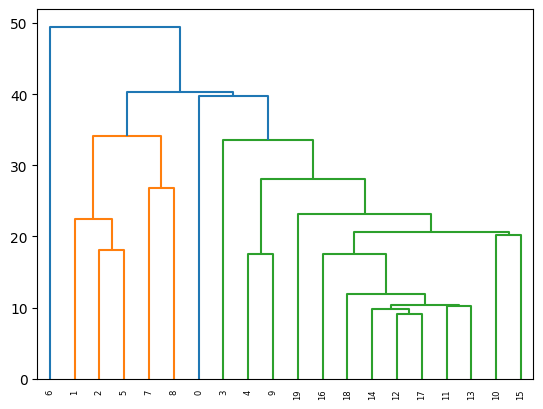

In [68]:
from scipy.cluster.hierarchy import linkage,dendrogram

merg = linkage(data3.iloc[200:220,:],method = 'single')
dendrogram(merg, leaf_rotation = 90, leaf_font_size = 6)
plt.show()



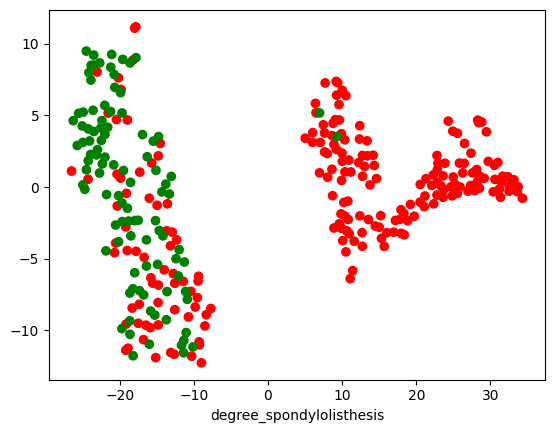

In [69]:
# T - Distrubted Stochastic Neighbor Embedding (T-SNE)

from sklearn.manifold import TSNE
model = TSNE(learning_rate=100)
transformed = model.fit_transform(data2)
x = transformed[:,0]
y = transformed[:,1]
plt.scatter(x,y,c = color_list )
plt.xlabel('pelvic_radius')
plt.xlabel('degree_spondylolisthesis')
plt.show()

In [70]:
# Principle component analysis (PCA)

from sklearn.decomposition import PCA
model = PCA()
model.fit(data3)
transformed = model.transform(data3)
print('Principle components: ',model.components_)

Principle components:  [[ 3.23645647e-01  1.13192291e-01  3.03674740e-01  2.10453357e-01
  -2.99598300e-02  8.63153779e-01]
 [ 4.76634849e-01  9.85632787e-02  5.32783979e-01  3.78071570e-01
  -3.21809199e-01 -4.82438036e-01]
 [ 1.54481282e-03  2.64657410e-01  4.96541893e-01 -2.63112598e-01
   7.74612852e-01 -1.18940778e-01]
 [ 3.73677251e-01  7.54113757e-01 -3.39411757e-01 -3.80436506e-01
  -1.75106042e-01 -3.29143086e-02]
 [ 4.41703869e-01 -7.35414748e-02 -5.12024113e-01  5.15245344e-01
   5.14639730e-01 -8.35992525e-02]
 [ 5.77350269e-01 -5.77350269e-01 -1.08946741e-11 -5.77350269e-01
  -3.59295926e-12  3.06643599e-12]]


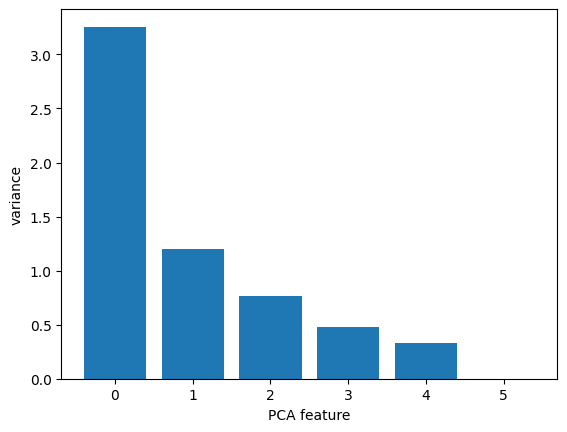

In [71]:
# PCA variance
scaler = StandardScaler()
pca = PCA()
pipeline = make_pipeline(scaler,pca)
pipeline.fit(data3)

plt.bar(range(pca.n_components_), pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.show()

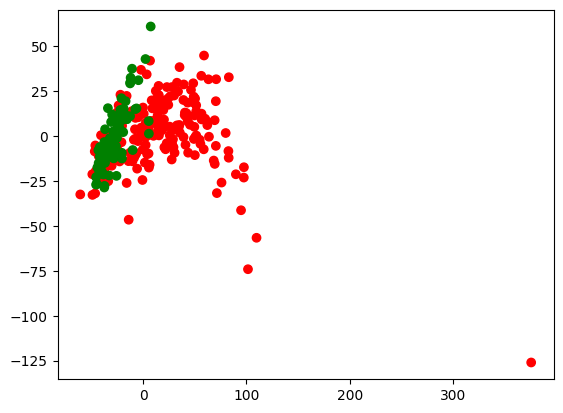

In [72]:
# apply PCA
pca = PCA(n_components = 2)
pca.fit(data3)
transformed = pca.transform(data3)
x = transformed[:,0]
y = transformed[:,1]
plt.scatter(x,y,c = color_list)
plt.show()